In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import numpy as np
from scipy import stats
import statistics

In [2]:
# Initialize an empty list to hold individual dataframes
df_list = []

# Directory containing the text files
data_dir = '/app/random_snellen_letters_results'

# Loop through each text file and read it into a DataFrame
for filename in os.listdir(data_dir):
    if filename.startswith("results_") and filename.endswith(".txt"):
        filepath = os.path.join(data_dir, filename)
        # Assuming each line in the text file is a seperate entry
        temp_df = pd.read_csv(filepath, header=None, names=['Combination'])
        df_list.append(temp_df)
# Combine all the dataframe into a single dataframe
final_df = pd.concat(df_list, ignore_index=True)

In [3]:
# Initialize an empty list to hold individual dataframes
df_list = []

# Directory containing the text files
data_dir = '/app/random_snellen_letters_results'  # Update this path to the one in your Docker volume

# Loop through each text file and read it into a DataFrame
for filename in os.listdir(data_dir):
    if filename.startswith("results_") and filename.endswith(".txt"):
        filepath = os.path.join(data_dir, filename)
        # Assuming each line in the text file is a separate entry
        temp_df = pd.read_csv(filepath, header=None, names=['Combination'])
        df_list.append(temp_df)

# Combine all the dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

In [4]:
df.head(5)

,Combination
0,PCOTEDZ
1,TELZDFO
2,FPLZECO
3,DLCEPZO
4,CTLEZPD


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304893 entries, 0 to 304892
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Combination  304893 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


## Let's check the frequency of each letter in all the lines combined

In [6]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
5,D,237695
4,E,237673
8,F,237402
2,O,237362
7,L,237286
0,P,237193
1,C,237058
6,Z,236538
3,T,236044


## Next we'll look at how random the combination of letters really was.

In [7]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

    Combination  Frequency
0       DTPZCTZ          3
148     OCFZDZD          3
137     LDPFCLD          3
138     ETDOLFZ          3
139     LOEOLED          3


The length of the original df is 304893, and the length of combination_frequency is 291867


In [8]:
combination_frequency.tail()

,Combination,Frequency
105834,CDPEOEL,1
105835,LCDZFPT,1
105836,FTETEDE,1
105837,TCFTOCE,1
291866,CEDCLCP,1


In [9]:
# Calculate basic statistical measures for individual letter frequencies
mean_frequency = letter_frequency_df['Frequency'].mean()
median_frequency = letter_frequency_df['Frequency'].median()
std_frequency = letter_frequency_df['Frequency'].std()

print(f"This is the mean frequency: {mean_frequency}")
print(f"This is the median frequency: {median_frequency}")
print(f"Here is the standard deviation frequency: {std_frequency}")

This is the mean frequency: 237139.0
This is the median frequency: 237286.0
Here is the standard deviation frequency: 536.7147752764032


In [10]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [11]:
df.head(20)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.0,None
1,TELZDFO,False,None,1.0,None
2,FPLZECO,False,None,1.0,None
3,DLCEPZO,False,None,1.0,None
4,CTLEZPD,False,None,1.0,None
5,ZFPCETO,False,None,1.0,None
6,FECZOLT,False,None,1.0,None
7,POCTDLE,False,None,1.0,None
8,LPTCZED,False,None,1.0,None
9,DZFPETL,False,None,1.0,None


In [12]:
df.tail(20)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
304873,TLFZOZC,False,Z,0.857143,{'Z': 2}
304874,ZCLTPFT,False,T,0.857143,{'T': 2}
304875,OPTPZFZ,False,P,0.714286,"{'P': 2, 'Z': 2}"
304876,EFDFLET,False,E,0.714286,"{'E': 2, 'F': 2}"
304877,FCFDZOD,False,F,0.714286,"{'F': 2, 'D': 2}"
304878,DODLEDZ,False,D,0.714286,{'D': 3}
304879,FTOCZTL,False,T,0.857143,{'T': 2}
304880,OCODLDL,False,O,0.571429,"{'O': 2, 'D': 2, 'L': 2}"
304881,OTEPZOL,False,O,0.857143,{'O': 2}
304882,ZEOZDLE,False,Z,0.714286,"{'Z': 2, 'E': 2}"


## Historgram of Letter Diversity

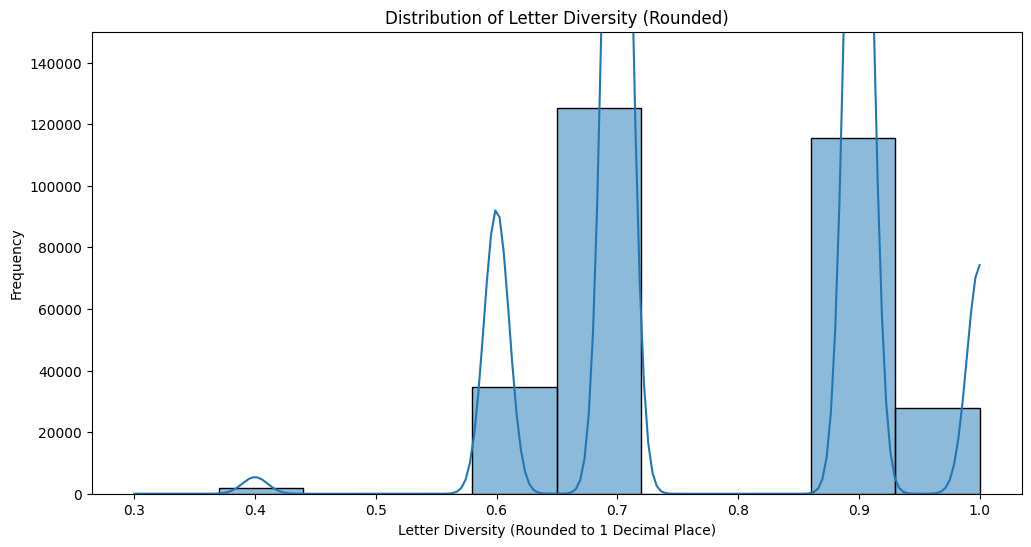

In [13]:
# Generate the histogram with a KDE (Kernel Density Estimation) curve
# Using only the first number after the decimal point for the 'Letter_Diversity' values
# Setting y-axis limit to 150,000 to focus on the lower range
plt.figure(figsize=(12, 6))
sb.histplot(df['Letter_Diversity'].round(1), bins=10, kde=True)

# Labels and title
plt.xlabel('Letter Diversity (Rounded to 1 Decimal Place)')
plt.ylabel('Frequency')
plt.title('Distribution of Letter Diversity (Rounded)')

# Set y-axis limit
plt.ylim(0, 150000)

# Show the plot
plt.show()


### Something Looks off about this, we should investigate. It doesn't even come close to resembling a bell curve

## Bar Chart for Max Repeated Letters

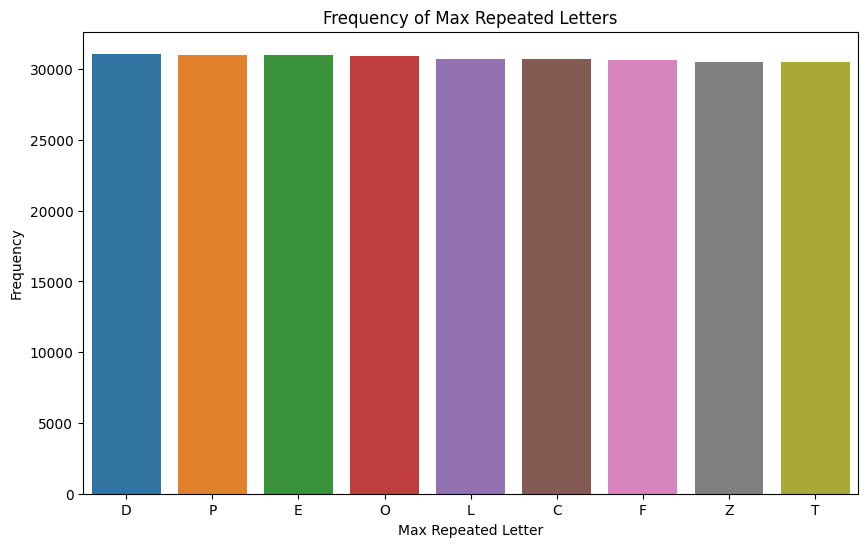

In [14]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Max_Repeated', order=df['Max_Repeated'].value_counts().index)
plt.title('Frequency of Max Repeated Letters')
plt.xlabel('Max Repeated Letter')
plt.ylabel('Frequency')
plt.show()

In [15]:
## Histogram for Palindromes

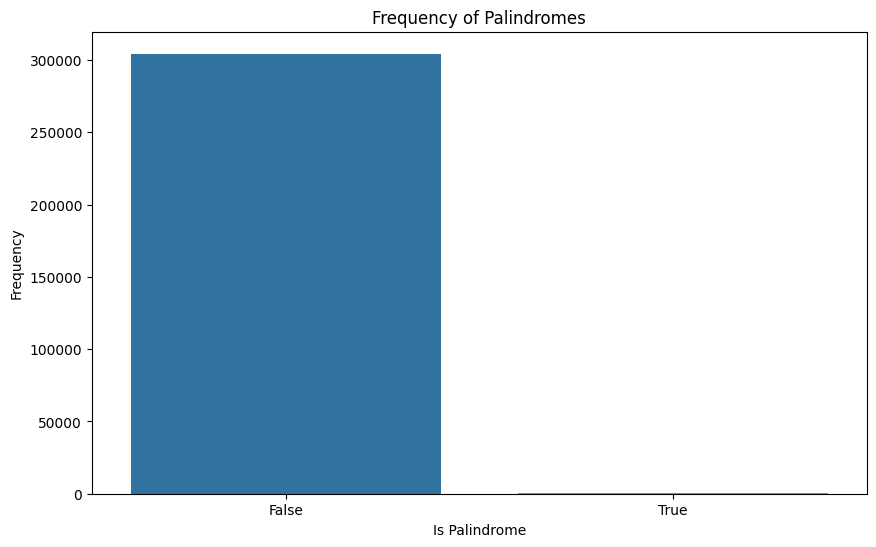

In [16]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Is_Palindrome')
plt.title('Frequency of Palindromes')
plt.xlabel('Is Palindrome')
plt.ylabel('Frequency')
plt.show()

## Let's see how many random combinations have 2 unique letters repeated.
Since there are 7 letters in our lines, there will be one extra random letter,
We're trying to see if there are lines made up of mostly repeating letters. That's not 
very desirable


In [17]:
# Filter the DataFrame to find combinations where only 2 letters are repeated
two_letter_repeat = df[df['Repeated_Letters'].apply(
    lambda x: x is not None and len(x) == 2 and all(count == 3 for count in x.values())
)]

# Count the number of such combinations
two_letter_repeat_count = len(two_letter_repeat)

print(f"There are {two_letter_repeat_count} lines that have 2 repeating letters.") 

There are 583 lines that have 2 repeating letters.


In [18]:
# Filter the DataFrame to find combinations where the Letter Diversity starts with 0.6
diversity_06 = df[df['Letter_Diversity'].apply(lambda x: str(x).startswith('0.6'))]

print(len(diversity_06))
print(f"Why are there no values that start with .6??")

# Display the filtered DataFrame
diversity_06.head(49)  # Displaying only the head to avoid too much output. You can remove .head() to see all.


0
Why are there no values that start with .6??


,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters


In playing around with the percentage in 'Letter_Diversity' there are {len(diversity_02)} combinations that start with 20%. There are {len(diversity_03)} rows that are in the 30% range, and {len(diversity_04)} in 40%. Even in the 40% range, with a row of 7 random letters you can get some pretty repetitive results such as --
5869:TLOLOLO, 9431:TLCLCTC	and 9854:EPTPETE	

In [19]:
# Calculate rounded diversity values and count their occurrences
rounded_diversity_counts = df['Letter_Diversity'].round(1).value_counts().sort_index()

# # Exclude mathematically impossible values (0.5 and 0.8)
# rounded_diversity_counts = rounded_diversity_counts[~rounded_diversity_counts.index.isin([0.5, 0.8])]

print("Counts for each rounded diversity value (excluding 0.5 and 0.8):")
print(rounded_diversity_counts)
print(f"I'm not seeing any values for 0.5, or 0.8 -- I wonder why that is")

Counts for each rounded diversity value (excluding 0.5 and 0.8):
0.3         6
0.4      2016
0.6     34539
0.7    125105
0.9    115475
1.0     27752
Name: Letter_Diversity, dtype: int64
I'm not seeing any values for 0.5, or 0.8 -- I wonder why that is


In [20]:
# Initialize an empty dictionary to store counts
diversity_startswith_counts = {}

# Loop over possible starting decimals from 0.3 to 1.0
for i in range(3, 11):
    starting_decimal = '0.' + str(i)
    
    # Filter the DataFrame based on the starting decimal and count the number of rows
    filtered_df = df[df['Letter_Diversity'].apply(lambda x: str(x).startswith(starting_decimal))]
    diversity_startswith_counts[starting_decimal] = len(filtered_df)

# Display the counts
print("Counts for each diversity value that starts with a specific decimal:")
for key, value in diversity_startswith_counts.items():
    print(f"{key}: {value}")
print(f"This doesn't look right. Let's get back to the basics and check value_counts()")

Counts for each diversity value that starts with a specific decimal:
0.3: 0
0.4: 2016
0.5: 34539
0.6: 0
0.7: 125105
0.8: 115475
0.9: 0
0.10: 0
This doesn't look right. Let's get back to the basics and check value_counts()


In [21]:
counter = df['Letter_Diversity'].value_counts()
print(counter)
vals = set(counter.keys())
vals
print(f"Okay, now we see that the variety of numbers is extremely limited ({vals}). They are discrete values")

0.714286    125105
0.857143    115475
0.571429     34539
1.000000     27752
0.428571      2016
0.285714         6
Name: Letter_Diversity, dtype: int64
Okay, now we see that the variety of numbers is extremely limited ({0.7142857142857143, 0.8571428571428571, 0.5714285714285714, 0.42857142857142855, 1.0, 0.2857142857142857}). They are discrete values


## Now that we know there are discrete values only, we can recheck distribution

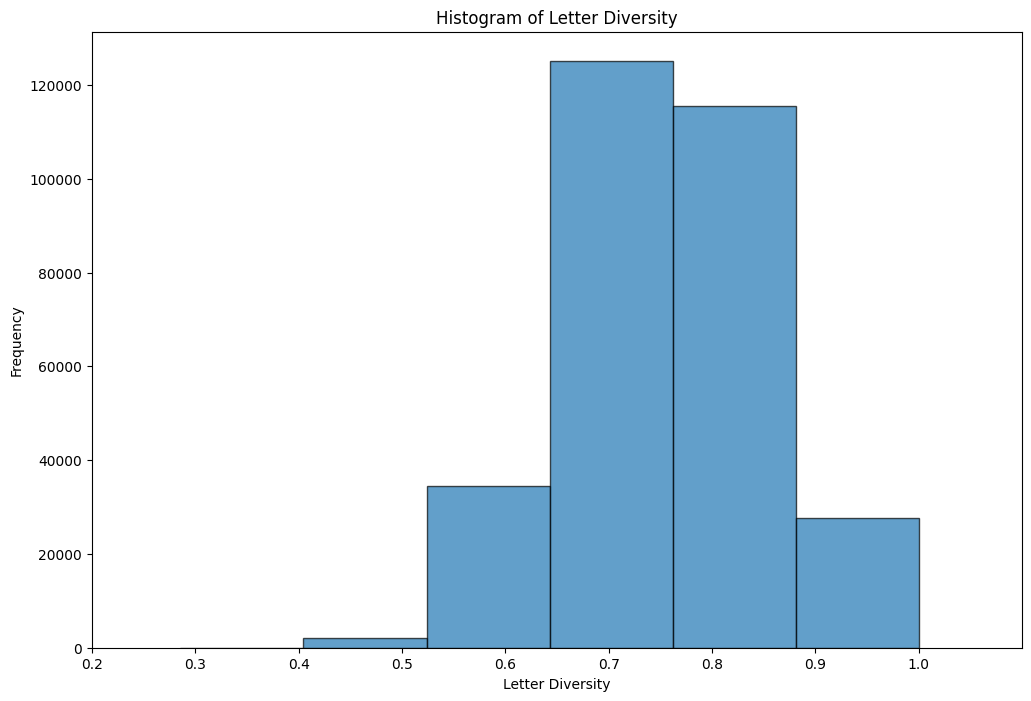

In [22]:
# Updating the sample data to simulate the DataFrame with the values you provided.
data = {'Letter_Diversity': [0.714286]*125105 + [0.857143]*115475 + [0.571429]*34539 +
        [1.000000]*27752 + [0.428571]*2016 + [0.285714]*6}

df = pd.DataFrame(data)

# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(df['Letter_Diversity'], bins=6, edgecolor='black', alpha=0.7, label='Letter Diversity')
plt.xlim([0.2, 1.1])

# Adding the x-ticks
plt.xticks(np.arange(0.2, 1.1, 0.1))

# Add a title and labels
plt.title('Histogram of Letter Diversity')
plt.xlabel('Letter Diversity')
plt.ylabel('Frequency')

# Show the plot
plt.show()


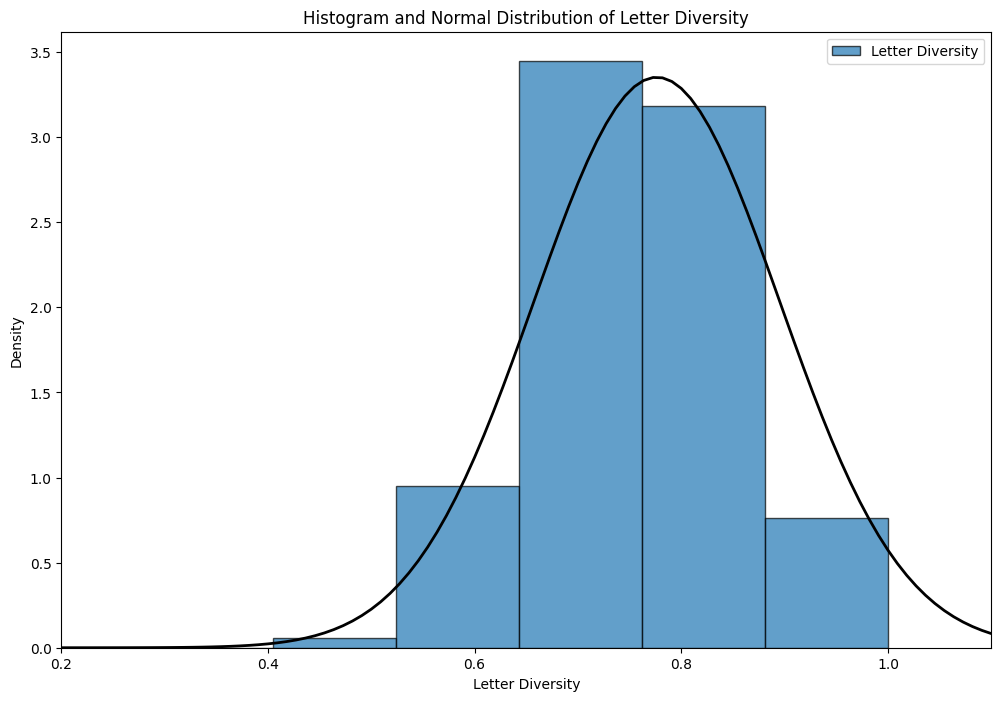

In [23]:
from scipy.stats import norm

# Create the histogram
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(df['Letter_Diversity'], bins=6, edgecolor='black', alpha=0.7, label='Letter Diversity', density=True)
plt.xlim([0.2, 1.1])

# Fit a normal distribution to the data
mu, std = norm.fit(df['Letter_Diversity'])

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add a title and labels
plt.title('Histogram and Normal Distribution of Letter Diversity')
plt.xlabel('Letter Diversity')
plt.ylabel('Density')

# Add legends
plt.legend()

# Show the plot
plt.show()


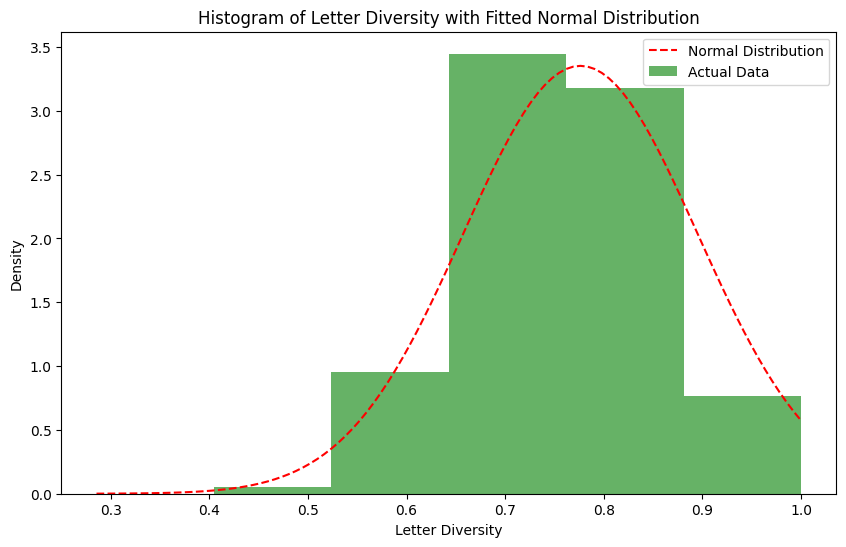

In [24]:
from scipy.stats import norm
import numpy as np

# Calculate the mean and standard deviation of the Letter Diversity column
mean, std = df['Letter_Diversity'].mean(), df['Letter_Diversity'].std()

# Create an array of x values representing the diversity values for plotting the normal distribution
x_values = np.linspace(df['Letter_Diversity'].min(), df['Letter_Diversity'].max(), 100)

# Calculate the y values based on the probability density function of the normal distribution
y_values = norm.pdf(x_values, mean, std)

# Create the histogram and normal distribution curve
plt.figure(figsize=(10, 6))
plt.hist(df['Letter_Diversity'], bins=6, density=True, alpha=0.6, color='g', label='Actual Data')
plt.plot(x_values, y_values, 'r--', label='Normal Distribution')
plt.title('Histogram of Letter Diversity with Fitted Normal Distribution')
plt.xlabel('Letter Diversity')
plt.ylabel('Density')
plt.legend()
plt.show()


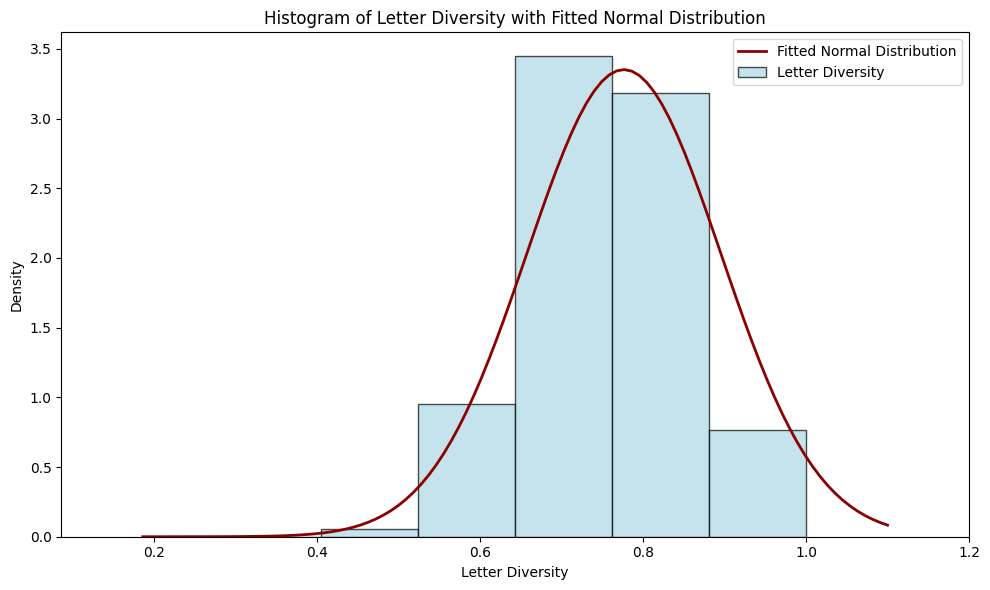

In [25]:
# Calculate the range for x-axis
x_range = np.linspace(df['Letter_Diversity'].min() - 0.1, df['Letter_Diversity'].max() + 0.1, 100)

# Calculate the normal distribution values based on the mean and standard deviation of the data
y_values = norm.pdf(x_range, df['Letter_Diversity'].mean(), df['Letter_Diversity'].std())

# Plot the histogram and the normal distribution curve
plt.figure(figsize=(10, 6))
plt.hist(df['Letter_Diversity'], bins=6, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Letter Diversity')
plt.plot(x_range, y_values, color='darkred', lw=2, label='Fitted Normal Distribution')

plt.title("Histogram of Letter Diversity with Fitted Normal Distribution")
plt.xlabel("Letter Diversity")
plt.ylabel("Density")
plt.legend()
plt.xlim(df['Letter_Diversity'].min() - 0.2, df['Letter_Diversity'].max() + 0.2)  # Extend x-axis range for better visual
plt.tight_layout()
plt.show()


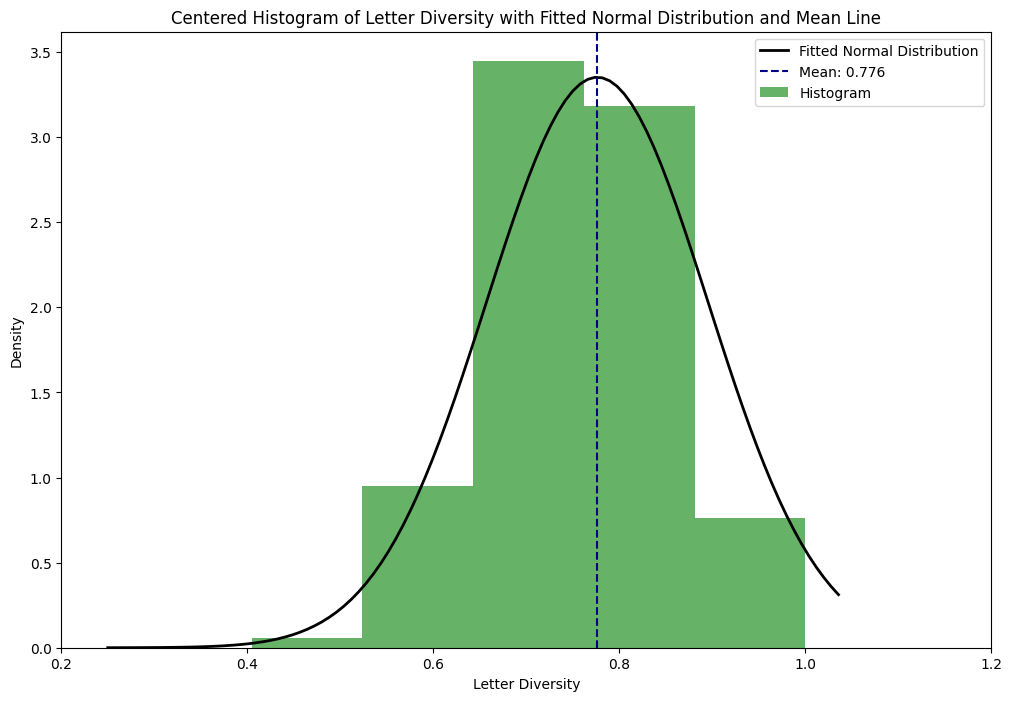

In [26]:
# To center the distribution and mean line in the plot, we need to adjust the x-axis limits.

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(df['Letter_Diversity'], bins=6, density=True, alpha=0.6, color='g', label='Histogram')

# Plotting the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# Adding the mean line
mean = np.mean(df['Letter_Diversity'])
plt.axvline(mean, color='darkblue', linestyle='--', label=f'Mean: {mean:.3f}')

# Centering the plot by adjusting x-axis limits
plt.xlim(0.2, 1.2)

# Adding titles and labels
plt.title("Centered Histogram of Letter Diversity with Fitted Normal Distribution and Mean Line")
plt.xlabel("Letter Diversity")
plt.ylabel("Density")

# Adding legend
plt.legend()

plt.show()


In [27]:
kurt = stats.kurtosis(df['Letter_Diversity'])
print(f"The kurtosis for the distribution is {kurt : .2f}. This is pushing the limit of normal and\nnearing Leptokurtic, which occurs if the number is less than -1 or greater than +1")

The kurtosis for the distribution is -0.27. This is pushing the limit of normal and
nearing Leptokurtic, which occurs if the number is less than -1 or greater than +1


# After changing main.py to include only results for combinations with Diversity > 0.7142

If you need instructions to run locally with docker (`/Documents/dockers/random_letters) check out Google Doc Docker_Random_Letter_Genrtr_Notes) or GPT-4 random letters 2

In [28]:
data = "/app/random_snellen_above_0.7142/results_20230829033125.txt"
df = pd.read_csv(data, header=None, names=['Combination'])
print(df.head())
print()
print(df.tail())

  Combination
0     OFPZTDE
1     FOCDPTZ
2     COTEZPL
3     CPLOFTD
4     LZOPTDC

       Combination
181436     CTZDOLP
181437     EZTFLPD
181438     DCPOFTL
181439     OTDLECZ
181440     OTFPEDC


## Okay, These look excellent. let's run the exact same process as we did with the first results
### Getting some info

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181441 entries, 0 to 181440
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Combination  181441 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


## Let's check the frequency of each letter in all the lines combined

In [30]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
0,O,141121
1,F,141121
2,P,141121
3,Z,141121
4,T,141121
5,D,141121
6,E,141121
7,C,141121
8,L,141121


## Ohhhh man, that's as perfect as it gets

In [31]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")
print()
print(f"That means we have only unique lines of letters from the test card")

       Combination  Frequency
0          OFPZTDE          1
120932     PFCDTZL          1
120956     OLFTZEC          1
120957     TOPLDCE          1
120958     COTEZPL          1


The length of the original df is 181441, and the length of combination_frequency is 181441

That means we have only unique lines of letters from the test card


In [32]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [33]:
print(df.head())

  Combination  Is_Palindrome Max_Repeated  Letter_Diversity Repeated_Letters
0     OFPZTDE          False         None               1.0             None
1     FOCDPTZ          False         None               1.0             None
2     COTEZPL          False         None               1.0             None
3     CPLOFTD          False         None               1.0             None
4     LZOPTDC          False         None               1.0             None


In [34]:
unique_vals = df['Repeated_Letters'].unique()
unique_vals

array([None], dtype=object)

It appears there are no repeating letters in any of the lines. This gives us a little room to grow. We don't necessarily need the there to be no repeating letters at all. We just don't want lines like 'COCOCOL'

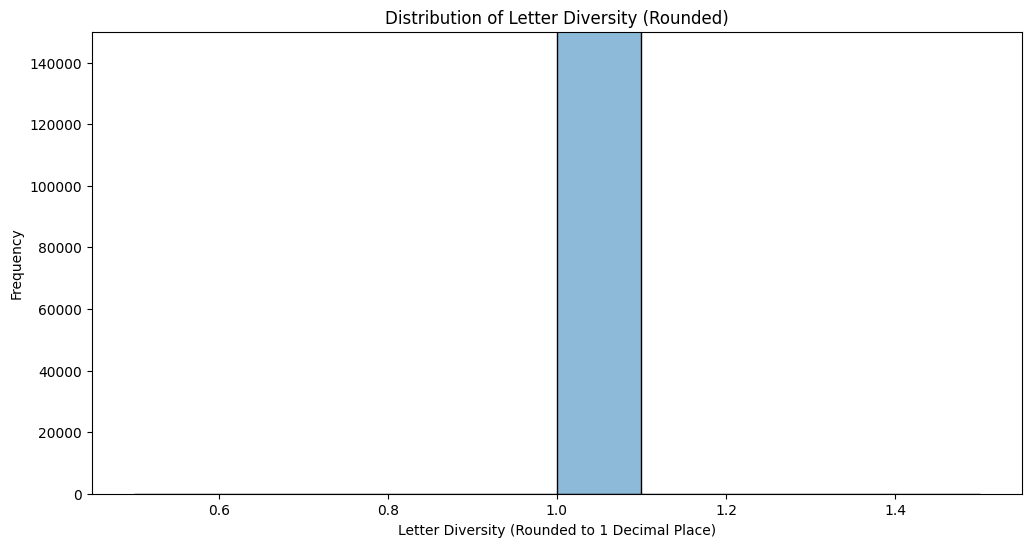

In [35]:
# Generate the histogram with a KDE (Kernel Density Estimation) curve
# Using only the first number after the decimal point for the 'Letter_Diversity' values
# Setting y-axis limit to 150,000 to focus on the lower range
plt.figure(figsize=(12, 6))
sb.histplot(df['Letter_Diversity'].round(1), bins=10, kde=True)

# Labels and title
plt.xlabel('Letter Diversity (Rounded to 1 Decimal Place)')
plt.ylabel('Frequency')
plt.title('Distribution of Letter Diversity (Rounded)')

# Set y-axis limit
plt.ylim(0, 150000)

# Show the plot
plt.show()

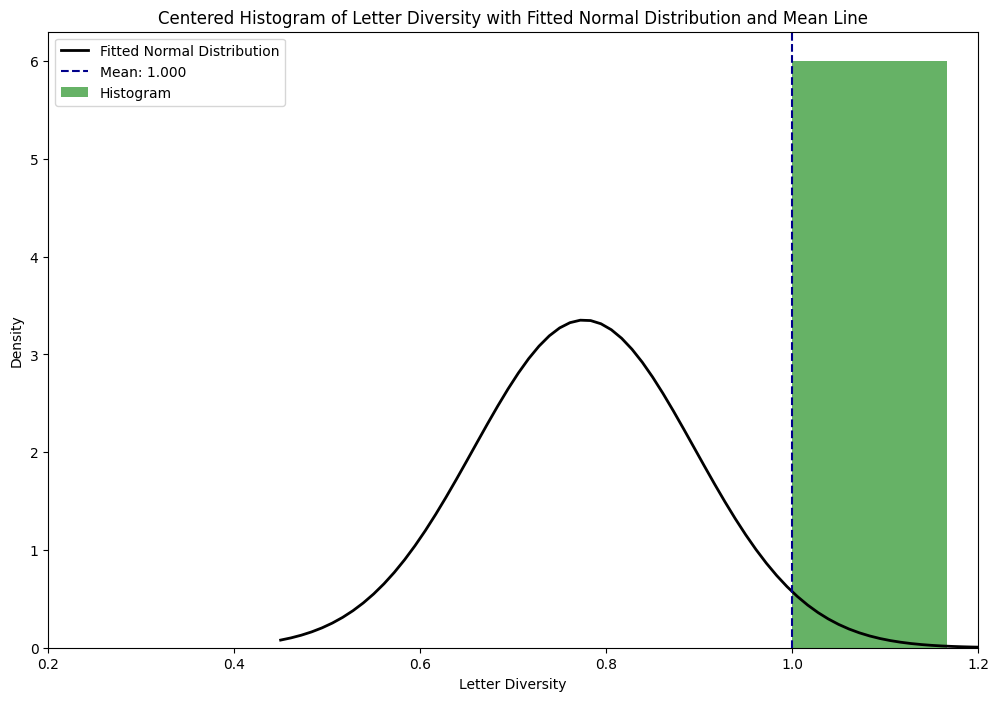

In [36]:
# To center the distribution and mean line in the plot, we need to adjust the x-axis limits.

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(df['Letter_Diversity'], bins=6, density=True, alpha=0.6, color='g', label='Histogram')

# Plotting the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# Adding the mean line
mean = np.mean(df['Letter_Diversity'])
plt.axvline(mean, color='darkblue', linestyle='--', label=f'Mean: {mean:.3f}')

# Centering the plot by adjusting x-axis limits
plt.xlim(0.2, 1.2)

# Adding titles and labels
plt.title("Centered Histogram of Letter Diversity with Fitted Normal Distribution and Mean Line")
plt.xlabel("Letter Diversity")
plt.ylabel("Density")

# Adding legend
plt.legend()

plt.show()


There is no normal distribution in this run, because we have perfect diversity

# Let's try that with some duplicate letters in some lines. I've made some changes again to main.py

In [37]:
data = "/app/random_snellen_above_0.7142/results_20230905202311.txt"
df = pd.read_csv(data, header=None, names=['Combination'])
print(df.head())
print()
print(df.tail())

  Combination
0     CPOLTDE
1     TEPDLCO
2     CEFOZDL
3     EFTPOZL
4     DTOZCPF

       Combination
185200     DOLFZEP
185201     LFCZPDO
185202     TZLFEOD
185203     LECDOPT
185204     ETLFPZD


In [38]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
8,Z,144110
1,P,144088
3,L,144082
0,C,144059
2,O,144056
4,T,144014
5,D,144009
6,E,144009
7,F,144008


## Ok, Now we've got some variance in letter distribution

In [39]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

       Combination  Frequency
0          CPOLTDE          1
123464     FPLECTZ          1
123466     FCTZLDP          1
123467     CEFOZDL          1
123468     EFTPOZL          1


The length of the original df is 185205, and the length of combination_frequency is 185205


In [40]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [41]:
df.head()

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,CPOLTDE,False,None,1.0,None
1,TEPDLCO,False,None,1.0,None
2,CEFOZDL,False,None,1.0,None
3,EFTPOZL,False,None,1.0,None
4,DTOZCPF,False,None,1.0,None


In [42]:
filtered_df = df[df['Repeated_Letters'].apply(lambda x: x is not None)]
filtered_df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
40,ETLCZPP,False,P,0.857143,{'P': 2}
108,OTTLDEC,False,T,0.857143,{'T': 2}
114,PTZLDOP,False,P,0.857143,{'P': 2}
146,ZLPODZC,False,Z,0.857143,{'Z': 2}
193,PFLTZZO,False,Z,0.857143,{'Z': 2}
...,...,...,...,...,...
185008,OFCETPE,False,E,0.857143,{'E': 2}
185081,PZCTDPE,False,P,0.857143,{'P': 2}
185126,ZPZTCEL,False,Z,0.857143,{'Z': 2}
185136,EFOOTDZ,False,O,0.857143,{'O': 2}


## I'm seeing consecutive repeating letters in line 193 'PFLTZZO' and again in line 185136 'EFOOTDZ'

# Let's give it another shot, I've made some adjustments to main.py again

In [43]:
data = "/app/random_snellen_above_0.7142/results_20230905203430.txt"
df = pd.read_csv(data, header=None, names=['Combination'])
print(df.head())
print()
print(df.tail())

  Combination
0     OCZFTPL
1     TFLPCDZ
2     DPLTOZC
3     FZELCOT
4     DLTOFTE

       Combination
185207     PLEDCZT
185208     FZCEDLP
185209     PCDTLFE
185210     EZLDOCP
185211     DTEPFZO


In [44]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
2,Z,144125
8,E,144104
6,L,144092
5,P,144075
3,F,144037
7,D,144036
4,T,144019
1,C,143999
0,O,143997


In [45]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

       Combination  Frequency
0          OCZFTPL          1
123468     ZDELTPF          1
123470     CDOLTPE          1
123471     CZTFPDO          1
123472     DPLTOZC          1


The length of the original df is 185212, and the length of combination_frequency is 185212


In [46]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [47]:
df.head(10)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,OCZFTPL,False,None,1.000000,None
1,TFLPCDZ,False,None,1.000000,None
2,DPLTOZC,False,None,1.000000,None
3,FZELCOT,False,None,1.000000,None
4,DLTOFTE,False,T,0.857143,{'T': 2}
5,FCLDEPZ,False,None,1.000000,None
6,EDTLPCZ,False,None,1.000000,None
7,DTOZELP,False,None,1.000000,None
8,EZTCLDP,False,None,1.000000,None
9,LOPCZDT,False,None,1.000000,None


In [48]:
filtered_df = df[df['Repeated_Letters'].apply(lambda x: x is not None)]
filtered_df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
4,DLTOFTE,False,T,0.857143,{'T': 2}
69,OLFOETP,False,O,0.857143,{'O': 2}
117,ZDFTEZP,False,Z,0.857143,{'Z': 2}
167,ZZOPDTL,False,Z,0.857143,{'Z': 2}
175,ZFCDOCP,False,C,0.857143,{'C': 2}
...,...,...,...,...,...
184839,DODLEFC,False,D,0.857143,{'D': 2}
184948,TPCEPOZ,False,P,0.857143,{'P': 2}
184959,FZFPCLO,False,F,0.857143,{'F': 2}
185050,POECZDE,False,E,0.857143,{'E': 2}


### Still seeing some consecutive repeats like in line 167 'ZZOPDTL'

# Let's give it another shot, trying something different in main.py

In [49]:
data = "/app/random_snellen_above_0.7142/results_20230905204322.txt"
df = pd.read_csv(data, header=None, names=['Combination'])
print(df.head())
print()
print(df.tail())

  Combination
0     PZTLFDO
1     TOECDFL
2     EZDOLFP
3     PETDLZO
4     EZDPCOF

       Combination
184601     FZDLCPT
184602     ELTFODC
184603     FTOEZPL
184604     FETZCPL
184605     OTLZCPE


In [50]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
4,F,143661
1,Z,143616
2,T,143585
3,L,143578
5,D,143572
8,C,143567
0,P,143557
6,O,143555
7,E,143551


In [51]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

       Combination  Frequency
0          PZTLFDO          1
123064     CEDZLFO          1
123066     OZPLDCT          1
123067     CDLZTFE          1
123068     EZDOLFP          1


The length of the original df is 184606, and the length of combination_frequency is 184606


In [52]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [53]:
df.head(10)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PZTLFDO,False,None,1.0,None
1,TOECDFL,False,None,1.0,None
2,EZDOLFP,False,None,1.0,None
3,PETDLZO,False,None,1.0,None
4,EZDPCOF,False,None,1.0,None
5,CPLDFTZ,False,None,1.0,None
6,PDFZLEC,False,None,1.0,None
7,CTZDELF,False,None,1.0,None
8,LFETCZP,False,None,1.0,None
9,LCOPFDT,False,None,1.0,None


In [54]:
filtered_df = df[df['Repeated_Letters'].apply(lambda x: x is not None)]
filtered_df.head(10)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
192,LODTFZT,False,T,0.857143,{'T': 2}
197,DCFPDLO,False,D,0.857143,{'D': 2}
237,LFZELPT,False,L,0.857143,{'L': 2}
252,ZOEDLCD,False,D,0.857143,{'D': 2}
266,CLCODEF,False,C,0.857143,{'C': 2}
338,ZDEEFCL,False,E,0.857143,{'E': 2}
467,OFLEDTE,False,E,0.857143,{'E': 2}
485,FLTZOET,False,T,0.857143,{'T': 2}
681,TPPEZLD,False,P,0.857143,{'P': 2}
730,FODOCZE,False,O,0.857143,{'O': 2}


# Now this time I'm serious...Let's give it another go

In [55]:
data = "/app/random_snellen_above_0.7142/results_20230905205331.txt"
df = pd.read_csv(data, header=None, names=['Combination'])
print(df.head())
print()
print(df.tail())

  Combination
0     ELDCOPF
1     OPFZTLD
2     OPZDETC
3     CTZPFEL
4     ZFLDCEO

       Combination
184601     EPCDZLO
184602     OELDTZP
184603     ZLCPOEF
184604     LOEPCZD
184605     FOECZTD


In [56]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
5,P,143634
2,D,143612
7,Z,143609
3,C,143597
0,E,143590
1,L,143579
8,T,143558
6,F,143540
4,O,143523


In [57]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

       Combination  Frequency
0          ELDCOPF          1
123064     COTFELZ          1
123066     ZCTFODE          1
123067     TCOLEDF          1
123068     OPZDETC          1


The length of the original df is 184606, and the length of combination_frequency is 184606


In [58]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [59]:
df.head(10)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,ELDCOPF,False,None,1.0,None
1,OPFZTLD,False,None,1.0,None
2,OPZDETC,False,None,1.0,None
3,CTZPFEL,False,None,1.0,None
4,ZFLDCEO,False,None,1.0,None
5,EOLDZCF,False,None,1.0,None
6,CPLFTEZ,False,None,1.0,None
7,FECTOLD,False,None,1.0,None
8,CZLTEPF,False,None,1.0,None
9,DFZPOCE,False,None,1.0,None


In [60]:
filtered_df = df[df['Repeated_Letters'].apply(lambda x: x is not None)]
filtered_df.head(10)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
14,DZEPOZC,False,Z,0.857143,{'Z': 2}
177,OZDPCPE,False,P,0.857143,{'P': 2}
184,ZCELZTP,False,Z,0.857143,{'Z': 2}
246,CTZPDDO,False,D,0.857143,{'D': 2}
381,CFTDFPO,False,F,0.857143,{'F': 2}
445,CTPLDCO,False,C,0.857143,{'C': 2}
550,COZCLTD,False,C,0.857143,{'C': 2}
713,FETTZDC,False,T,0.857143,{'T': 2}
749,ELTCZOT,False,T,0.857143,{'T': 2}
765,CDTZPOO,False,O,0.857143,{'O': 2}


## Not quite, hmmm. back to the drawing board

In [61]:
data = "/app/random_snellen_above_0.7142/results_20230905210421.txt"
df = pd.read_csv(data, header=None, names=['Combination'])
print(df.head())
print()
print(df.tail())

  Combination
0     CTPZDOL
1     EDPCTOF
2     PDTFLOE
3     CPDTEOZ
4     DOPEZFL

       Combination
185054     ODFZCET
185055     ZFCETDO
185056     OZDEFLC
185057     DFLZCTO
185058     COZLTDP


In [62]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
2,P,144023
3,Z,143953
8,F,143951
1,T,143948
4,D,143931
5,O,143912
6,L,143910
7,E,143897
0,C,143888


In [63]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

       Combination  Frequency
0          CTPZDOL          1
123365     DCPEOTL          1
123367     ZDCPTFL          1
123368     TZPCLDF          1
123369     OFDCPET          1


The length of the original df is 185059, and the length of combination_frequency is 185059


In [64]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [65]:
df.head(10)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,CTPZDOL,False,None,1.0,None
1,EDPCTOF,False,None,1.0,None
2,PDTFLOE,False,None,1.0,None
3,CPDTEOZ,False,None,1.0,None
4,DOPEZFL,False,None,1.0,None
5,EZLCDFO,False,None,1.0,None
6,FTLCOPZ,False,None,1.0,None
7,POZEFCD,False,None,1.0,None
8,FOELZDC,False,None,1.0,None
9,OPFTLDE,False,None,1.0,None


In [66]:
filtered_df = df[df['Repeated_Letters'].apply(lambda x: x is not None)]
filtered_df.head(10)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
152,PDZFTZC,False,Z,0.857143,{'Z': 2}
170,DOTCLDP,False,D,0.857143,{'D': 2}
332,LZCETZP,False,Z,0.857143,{'Z': 2}
350,DZFOPFT,False,F,0.857143,{'F': 2}
539,EOEZPTC,False,E,0.857143,{'E': 2}
594,CTZEOCP,False,C,0.857143,{'C': 2}
610,PDPTCZF,False,P,0.857143,{'P': 2}
673,FTCPLFZ,False,F,0.857143,{'F': 2}
677,OCOEFLP,False,O,0.857143,{'O': 2}
703,DPDOZCT,False,D,0.857143,{'D': 2}


In [67]:
filtered_df.head(50)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
152,PDZFTZC,False,Z,0.857143,{'Z': 2}
170,DOTCLDP,False,D,0.857143,{'D': 2}
332,LZCETZP,False,Z,0.857143,{'Z': 2}
350,DZFOPFT,False,F,0.857143,{'F': 2}
539,EOEZPTC,False,E,0.857143,{'E': 2}
594,CTZEOCP,False,C,0.857143,{'C': 2}
610,PDPTCZF,False,P,0.857143,{'P': 2}
673,FTCPLFZ,False,F,0.857143,{'F': 2}
677,OCOEFLP,False,O,0.857143,{'O': 2}
703,DPDOZCT,False,D,0.857143,{'D': 2}


In [68]:
filtered_df.tail(50)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
182641,OFTOPLC,False,O,0.857143,{'O': 2}
182665,LDLZOCP,False,L,0.857143,{'L': 2}
182680,OLOTEDC,False,O,0.857143,{'O': 2}
182770,DELZECO,False,E,0.857143,{'E': 2}
182850,PCLPZOT,False,P,0.857143,{'P': 2}
182871,TOLDZDF,False,D,0.857143,{'D': 2}
182879,TEDFZEO,False,E,0.857143,{'E': 2}
182945,EZDLTLF,False,L,0.857143,{'L': 2}
182952,FZLCPFT,False,F,0.857143,{'F': 2}
183007,DLPEFEO,False,E,0.857143,{'E': 2}


### Ladies and gentlemen...We got em